<h1>Does Location Relative to the Equator Correlate Weather Patterns?</h1>

<h2>Dependencies and Range of Latitude and Longitude</h2>

In [6]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
todays_date = str(dt.now()).split(" ")[0]

<h2>Acquire Cities</h2>

In [12]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

588

<h2>Pull Weather Data By City</h2>

In [13]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

#batch variables
#batch_set = 50

def get_weather(indices):
    
    print("Beginning Data Retrieval")
    print("--------------------------------------")
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            
            print(f"Processing Record {city + 1} | {indices[city]}")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_date = city_response['dt']
            city_clouds = city_response['clouds']['all']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "date": city_date,
                "cloudiness": city_clouds,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            
            print("Missing field/result... skipping.")
            
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "date": np.nan,
                "cloudiness": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list
        city_weathers.append(city_weather)



# for x in range(0, city_count, batch_set):
#     set_num = batch_set[x]
#     get_weather(cities) 

get_weather(cities)    

Beginning Data Retrieval
--------------------------------------
Processing Record 1 | ginir
Processing Record 2 | statesville
Processing Record 3 | thompson
Processing Record 4 | port keats
Processing Record 5 | busselton
Processing Record 6 | bagan
Processing Record 7 | tautira
Processing Record 8 | rikitea
Processing Record 9 | jamestown
Processing Record 10 | bredasdorp
Processing Record 11 | punta arenas
Processing Record 12 | kapaa
Processing Record 13 | arman
Processing Record 14 | pedasi
Processing Record 15 | zafarabad
Processing Record 16 | aklavik
Processing Record 17 | camacha
Processing Record 18 | halalo
Missing field/result... skipping.
Processing Record 19 | klaksvik
Processing Record 20 | koumac
Processing Record 21 | manaure
Processing Record 22 | fortuna
Processing Record 23 | dianopolis
Missing field/result... skipping.
Processing Record 24 | hami
Processing Record 25 | port augusta
Processing Record 26 | saldanha
Processing Record 27 | mitsamiouli
Processing Record 

Processing Record 226 | haderslev
Processing Record 227 | santa maria
Processing Record 228 | prieska
Processing Record 229 | natal
Processing Record 230 | kutum
Processing Record 231 | vero beach
Processing Record 232 | zenzeli
Processing Record 233 | anadyr
Processing Record 234 | vila franca do campo
Processing Record 235 | manokwari
Processing Record 236 | barentsburg
Missing field/result... skipping.
Processing Record 237 | kruisfontein
Processing Record 238 | vikulovo
Processing Record 239 | iqaluit
Processing Record 240 | kirakira
Processing Record 241 | kuche
Missing field/result... skipping.
Processing Record 242 | farrukhnagar
Processing Record 243 | tsihombe
Missing field/result... skipping.
Processing Record 244 | souillac
Processing Record 245 | christchurch
Processing Record 246 | constitucion
Processing Record 247 | balkhash
Processing Record 248 | amarante do maranhao
Processing Record 249 | pouembout
Processing Record 250 | ovalle
Processing Record 251 | aksha
Processi

Processing Record 447 | ambulu
Processing Record 448 | namatanai
Processing Record 449 | carutapera
Processing Record 450 | hay river
Processing Record 451 | tandil
Processing Record 452 | tingi
Processing Record 453 | umm kaddadah
Processing Record 454 | luleburgaz
Processing Record 455 | irbeyskoye
Processing Record 456 | bereda
Processing Record 457 | san patricio
Processing Record 458 | kununurra
Processing Record 459 | pitimbu
Processing Record 460 | grand-lahou
Processing Record 461 | harper
Processing Record 462 | camacupa
Processing Record 463 | ayagoz
Processing Record 464 | mogadishu
Processing Record 465 | havre
Processing Record 466 | levelland
Processing Record 467 | koungou
Missing field/result... skipping.
Processing Record 468 | isiro
Processing Record 469 | jalapa
Processing Record 470 | hinton
Processing Record 471 | lukulu
Processing Record 472 | husavik
Processing Record 473 | fort-shevchenko
Processing Record 474 | nanakuli
Processing Record 475 | jiddah
Missing fi

<h2>Send Output to CSV</h2>

In [14]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

<h2>Display Dataframe</h2>

In [15]:
#display the dataframe

df = pd.DataFrame(city_weathers)
weather_df = df.dropna()

weather_df.count()

city               527
cloudiness         527
country            527
date               527
humidity           527
latitude           527
longitude          527
max temperature    527
wind speed         527
dtype: int64

In [16]:
weather_df['date'] = weather_df['date'].astype("str")
weather_df.head()

/Users/ashleymcgee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,cloudiness,country,date,humidity,latitude,longitude,max temperature,wind speed
0,ginir,12.0,ET,1552003308.0,70.0,7.14,40.71,58.86,2.64
1,statesville,90.0,US,1552003115.0,36.0,35.78,-80.89,51.80,3.36
2,thompson,40.0,CA,1551999600.0,35.0,55.74,-97.86,24.80,16.11
3,port keats,0.0,AU,1552003308.0,82.0,-14.25,129.55,85.82,10.02
4,busselton,88.0,AU,1552002915.0,60.0,-33.64,115.35,69.01,10.80


<h2>Visualization</h2>

<h3>Latitude vs Temperature Plot</h3>

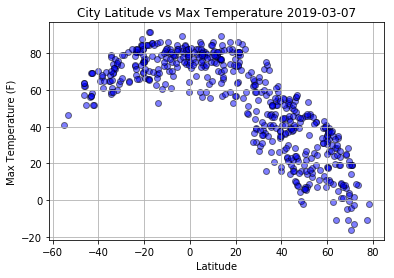

In [17]:
lat_temp_data = weather_df.groupby('city').sum()
y_axis_temp = lat_temp_data['max temperature']
x_axis_temp = lat_temp_data['latitude']
plt.scatter(x_axis_temp, y_axis_temp, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs Max Temperature %s" % todays_date)
plt.savefig("citylattemp.png")
plt.show()

<h4>Max Temperatures Relative to City Latitude</h4>
<p>Judging by the random sampling of coordinates taken from citipy, the city selection has a broad range of city locations. As we move below the equator, we can see that the high temperature for the day remained above 60 degrees Fahrenheit up to the -40 degrees south Latitude point. That is a significantly longer range of high temperatures than those above the equator, where temperatures begin to drop below 60 degrees Fahrenheit at about the 20 degrees north Latitude point. This has a lot to do with the fact that we're approaching fall south of the equator. Temperatures can be expected to be more mild this time of year. In the north-western and north-eastern hemispheres above the equator, we are experiencing a long, frigid winter. At roughly the equator, temperatures remain above 60 degrees Fahrenheit, with only 15 cities coming in with temperatures above 90 degrees Fahreneheit as of March 6, 2019. Given the persistent colloquialism that the closer to the equator one goes the hotter it gets, one would think more cities near the equator would report higher daily temperatures.</p>

<h3>Latitude vs Humidity Plot</h3>

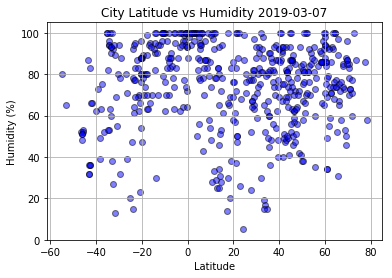

In [18]:
lat_humid_data = weather_df.groupby('city').mean()
x_axis_humid = lat_humid_data['latitude']
y_axis_humid = lat_humid_data['humidity']
plt.scatter(x_axis_humid, y_axis_humid, color='blue', edgecolor="black", alpha=0.5)
plt.ylim(0, 105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity %s" % todays_date)
plt.grid()
plt.savefig("citylathumid.png")
plt.show()

<h3>Latitude vs Cloudiness Plot</h3>

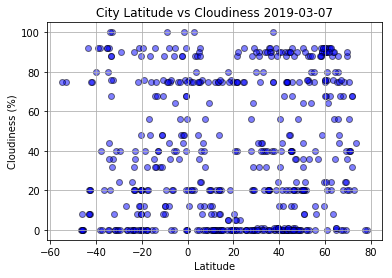

In [19]:
lat_clouds_data = weather_df.groupby('city').sum()
x_axis_clouds = lat_clouds_data['latitude']
y_axis_clouds = lat_clouds_data['cloudiness']
plt.scatter(x_axis_clouds, y_axis_clouds, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness %s" % todays_date)
plt.grid()
plt.savefig("citylatclouds.png")
plt.show()

<h4>Cloudiness vs Location Relative to the Equator</h4>
<p>It would appear that directly near and south of the equator (north of -20 degrees south Latitude) cloudiness tends to taper off that day. Though relative humidity plays a role in cloud formation, it would appear that it is not necessarily a cause of cloud formation, which is the presence of water condensation in the atmosphere. Normally, clouds form when warm, humid air from the ground rises to an elevation cool enough to form condensation. As we see in the humidity figure, a large cluster of cities near the equator seemed to experience high humidity (approaching 100%). On the same day, same set of cities on the cloudiness figure, there is a gap corresponding to the cluster on the humidity figure. Some other mitigating factor plays a role in cloud formation, and it is my belief that elevation and population density may be the missing links. Without at least the elevation levels of those cities to visualize beside the humidity and cloudiness figures, there is no other reasonable explanation for the lack of clouds in cities near the equator experiencing near 100% relative humidity.</p>

<h3>Latitude vs Wind Speed</h3>

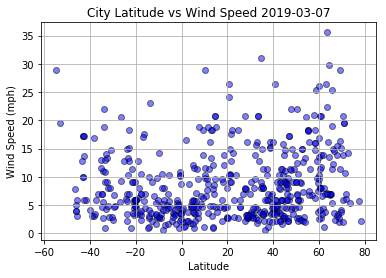

In [20]:
lat_wind_data = weather_df.groupby('city').sum()
x_axis_wind = lat_wind_data['latitude']
y_axis_wind = lat_wind_data['wind speed']
plt.scatter(x_axis_wind, y_axis_wind, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed %s" % todays_date)
plt.grid()
plt.savefig("citylatwinds.png")
plt.show()

<h4>City Wind Speeds Relative to the Equator</h4>
<p>One cannot observe wind speed without also observing temperature. As temperatures rise, air pressure increases. As air pressure increases from one area to the next, wind speeds increase. Also notice how those five are further away from the equator, where pressure changes are more volatile. Again, I don't see this as unusual. In the mild and temperate temperatures recorded yesterday, and given their spread in the temperature plot, we can see that the 166 cities recorded between -40 degrees south Latitude and 20 degrees north Latitude have a fairly concentrated selection of cities of low or zero windspeeds near the equator. As one moves further north of the equator, wind speeds become more varied, reaching above 22mph at roughly 40 degrees north Latitude. In other words, the relative uniformity of moderate temperatures nearer to the equator means longer gradients of air pressure, therefore slower wind speeds.</p>